# Algorithm for force plate calibration from Cedraro et al. (2008)

Marcos Duarte

Let's demonstrate the algorithm for force plate calibration proposed by Cedraro et al. (2008, 2009).  

A force plate (FP) is a electromechanical device that measures the components of the vectors force $(\mathbf{F} = [F_X,\, F_Y,\, F_Z])$ and moment of force or torque $(\mathbf{M} = [M_X,\, M_Y,\, M_Z])$ applied to the it. The FP is composed by a transducer that transforms a mechanical deformation to an electrical signal usually using strain gauges or piezoelectric sensors. The transformation from electrical signals (input) to force and moment of force (output) as a function of time in a six-component FP usually is given by the following linear relationship:

$$ 
\mathbf{L}(t) = 
\mathbf{C}\mathbf{V}(t)
$$

Where $\mathbf{L}(t)$ is the force plate output vector $([\mathbf{F}(t), \mathbf{M}(t)]^T)$, in N and Nm, $\mathbf{V}(t)$ is the vector of electrical signals (six voltage signals, in V) and  $\mathbf{C}$ is known as the six-by-six (constant) calibration matrix (in N/V or Nm/V). Note that we used the term vector here to refer to an uni-dimensional matrix (usual in scientific computing), which is different from vector/scalar concept in Mechanics.  
The expansion of the former equiation at a given instant is:

$$
\begin{bmatrix} 
F_x \\ F_y \\ F_z \\ M_x \\ M_y \\ M_z 
\end{bmatrix}\, = \,
\begin{bmatrix} 
C_{11} && C_{12} && C_{13} && C_{14} && C_{15} && C_{16} \\
C_{21} && C_{22} && C_{23} && C_{24} && C_{25} && C_{26} \\
C_{31} && C_{32} && C_{33} && C_{34} && C_{35} && C_{36} \\
C_{41} && C_{42} && C_{43} && C_{44} && C_{45} && C_{46} \\
C_{51} && C_{52} && C_{53} && C_{54} && C_{55} && C_{56} \\
C_{61} && C_{62} && C_{63} && C_{64} && C_{65} && C_{66}
\end{bmatrix}\,
\begin{bmatrix}
V_1 \\ V_2 \\ V_3 \\ V_4 \\ V_5 \\ V_6 
\end{bmatrix}
$$

The terms off-diagonal are known as the crosstalk terms and represent the effect of a load applied in one direction on the other direction. For a FP with none or small crosstalk, the off-diagonal terms are zero or very small compared to the main-diagonal terms. Note that the equation above is in fact a system of six linear independent equations with six unknowns each (where $V_1 ... V_6$ are the measured inputs):

\begin{cases}
    F_x &=& C_{11}V_1 + C_{12}V_2 + C_{13}V_3 + C_{14}V_4 + C_{15}V_5 + C_{16}V_6 \\
    F_y &=& C_{21}V_1 + C_{22}V_2 + C_{23}V_3 + C_{24}V_4 + C_{25}V_5 + C_{26}V_6 \\
    F_z &=& C_{31}V_1 + C_{32}V_2 + C_{33}V_3 + C_{34}V_4 + C_{35}V_5 + C_{36}V_6 \\
    M_x &=& C_{41}V_1 + C_{42}V_2 + C_{43}V_3 + C_{44}V_4 + C_{45}V_5 + C_{46}V_6 \\
    M_y &=& C_{51}V_1 + C_{52}V_2 + C_{53}V_3 + C_{54}V_4 + C_{55}V_5 + C_{56}V_6 \\
    M_z &=& C_{61}V_1 + C_{62}V_2 + C_{63}V_3 + C_{64}V_4 + C_{65}V_5 + C_{66}V_6 
\end{cases}

Of course, an important aspect of the FP functionning is that it should be calibrated, i.e., the calibration matrix must be known and accurate (it comes with the force plate when you buy one). Cedraro et al. (2008) propose a method for in situ re-calibration of FP and their algorithm is presented next.

## Algorithm

Consider that in a re-calibration procedure we apply on the FP known forces, $\mathbf{F}_I = [F_{X_I},\, F_{Y_I},\, F_{Z_I}]^T$, at known places, $\mathbf{COP} = [X_{COP},\,  Y_{COP},\,  Z_{COP}]$ (the center of pressure coordinates in the FP reference frame).  
The moments of forces, $\mathbf{M}_I = [M_{X_I},\, M_{Y_I},\, M_{Z_I}]^T$, due to these forces can be found using the equation $\mathbf{M}_I = \mathbf{COP} \times \mathbf{F}_I$, which can be expressed in matrix form as:

$$ 
\mathbf{M}_I = 
\begin{bmatrix} 
0 && -Z_{COP} && Y_{COP} \\
Z_{COP} && 0 && -X_{COP} \\
-Y_{COP} && X_{COP} && 0
\end{bmatrix}\, \mathbf{F}_I \, = \, \mathbf{A}_{COP}\mathbf{F}_I
$$

$\mathbf{A}_{COP}$ (a [skew-symmetric matrix](https://en.wikipedia.org/wiki/Skew-symmetric_matrix)) is simply the COP position in matrix form in order to calculate the [cross product with matrix multiplication](https://en.wikipedia.org/wiki/Cross_product).

These known loads on the FP can also be represented as:

$$ 
\mathbf{L}_I = 
\begin{bmatrix} 
\mathbf{F}_I \\
\mathbf{M}_I 
\end{bmatrix}
$$

### Linear re-calibration

For a linear re-calibration, the relationship between the measured FP output, $\mathbf{L}$, and the known loads, $\mathbf{L}_I$, is approximated by a linear equation:

$$ \mathbf{L}_I = \mathbf{C}\mathbf{L} + \mathbf{E} $$

Where $\mathbf{C}$ now is the six-by-six re-calibration matrix (with adimensional units) and $\mathbf{E}$ is a gaussian, uncorrelated, zero mean
noise six-by-one matrix.  
The re-calibration matrix can be found by solving the equation above and then $\mathbf{C}$ can be later used to re-calibrate the FP output:

$$ \mathbf{L}_C = \mathbf{C}\mathbf{L} $$

Where $\mathbf{L}_C$ is the re-calibrated FP output. For a perfectly calibrated FP, $\mathbf{L}_C = \mathbf{L}$ and $\mathbf{C} = \mathbf{I}$, the six-by-six identity matrix.

Cedraro et al. (2008, 2009) propose to use a calibrated three-component load cell (LC) to measure the loads $\mathbf{F}_I(t)$ applied on the FP at $k$ known measurements sites. The LC measures the loads in its own coordinate system $(xyz)$: $\mathbf{F}_{LC}(t) = [F_x(t),\, F_y(t),\, F_z(t)]^T$, which is probaly rotated (by an unknown value, represented by rotation matrix $\mathbf{R}^k$) in relation to the FP coordinate system (the coordinate systems are also translated to each other but the translation is known and given by the COP position).  
For each measurement site, the equation for the determination of the re-calibration matrix will be given by:

$$ \mathbf{P}^k\mathbf{R}^k\mathbf{F}^k_{LC}(t)= \mathbf{P}^k\mathbf{F}_I^k(t) = \mathbf{C}\mathbf{L}^k(t) + \mathbf{E}^k(t) \quad k = 1, ..., n $$

Where:

$$ 
\mathbf{P}^k = 
\begin{bmatrix} 
\mathbf{I}_3 \\
\mathbf{A}_{COP} 
\end{bmatrix}
$$

and $I_3$ is the three-by-three identity matrix.  

Using a typical load cell, with a flat bottom, on top the FP, a realistic assumption is to consider that $z$ of LC is aligned to $Z$ of FP (the vertical direction); in this case the rotation matrix is:

$$ 
\mathbf{R}^k = 
\begin{bmatrix} 
\cos\alpha^k && -\sin\alpha^k && 0 \\
\sin\alpha^k && \cos\alpha^k && 0 \\
0 && 0 && 1
\end{bmatrix}
$$


Cedraro et al. (2008) propose the following algorithm to estimate $\mathbf{C}$:
1. The misalignments, $\alpha^k$, are initialized: $\mathbf{\alpha} = [\alpha^1, \cdots, \alpha^n]$;
2. $\mathbf{C}$ is calculated by a least-squares approach;
3. The residual errors are estimated as: $\mathbf{E}^k(t) = \mathbf{P}^k\mathbf{R}^k\mathbf{F}^k_{LC}(t) - \mathbf{C}\mathbf{L}^k(t)$;
4. The increment $\mathbf{\Delta\alpha}$ is calculated by minimizing the cost function $\sum_{k,t}\mathbf{E}^k(t)^T\mathbf{E}^k(t)$, assuming dimensional unitary weights;
5. The parameters are updated: $\mathbf{\alpha} = \mathbf{\alpha} + \mathbf{\Delta\alpha}$.

The iteration of steps 2–5 stops when each $\Delta\alpha^k < \varepsilon_0$, where $\varepsilon_0=10^{-10}$ is the chosen threshold.

### Simulation

Let's simulate some data to test this calibration procedure. Cedraro et al. (2008) employ sinusoids, cosenoids, and ramps as sintetic signals to simulate the calibration process:

In [1]:
# import necessary libraries and environment customization:
import numpy as np
from numpy.linalg import inv, pinv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context("notebook", font_scale=1.4,
                rc={"lines.linewidth": 3, "lines.markersize": 8, "axes.titlesize": 'x-large'})

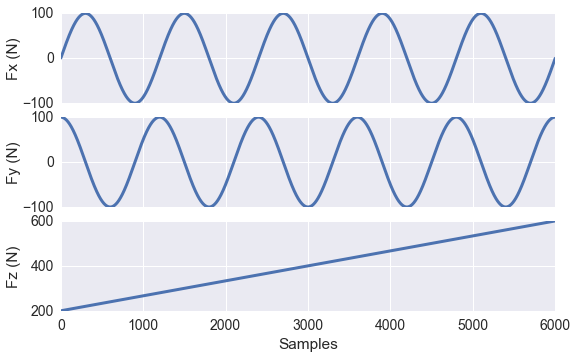

In [2]:
# simulated forces measured by the load cell in its local coordinate system
samples = np.linspace(1, 6000, 6000)
ns = samples.shape[0]
Flc = np.array([100*np.sin(5*2*np.pi*samples/samples[-1]),
                100*np.cos(5*2*np.pi*samples/samples[-1]),
                samples/15 + 200])
# plots
fig, axs = plt.subplots(3, 1, figsize=(8, 5), sharex='all')
axs[0].plot(samples, Flc[0])
axs[0].set_ylabel('Fx (N)')
axs[0].locator_params(axis='y', nbins=3)
axs[0].yaxis.set_label_coords(-.08, 0.5)
axs[1].plot(samples, Flc[1])
axs[1].set_ylabel('Fy (N)')
axs[1].locator_params(axis='y', nbins=3)
axs[1].yaxis.set_label_coords(-.08, 0.5)
axs[2].plot(samples, Flc[2])
axs[2].set_ylabel('Fz (N)')
axs[2].set_xlabel('Samples')
axs[2].locator_params(axis='y', nbins=3)
axs[2].yaxis.set_label_coords(-.08, 0.5)
plt.tight_layout(pad=.5, h_pad=.025)
plt.show()

And Cedraro et al. (2008) also proposed five measurement sites and a re-calibration matrix for the simulated re-calibration:

In [3]:
# simulated true re-calibration matrix
C = np.array([[ 1.0354, -0.0053, -0.0021, -0.0289, -0.0402,  0.0081],
              [ 0.0064,  1.0309, -0.0031,  0.0211,  0.0135, -0.0001],
              [ 0.0000, -0.0004,  1.0022, -0.0005, -0.0182,  0.0300],
              [-0.0012, -0.0385,  0.0002,  0.9328,  0.0007,  0.0017],
              [ 0.0347,  0.0003,  0.0008, -0.0002,  0.9325, -0.0024],
              [-0.0004, -0.0013, -0.0003, -0.0023,  0.0035,  1.0592]])
# five k measurements sites (in m)
COP = np.array([[   0,  112,  112, -112, -112],
                [   0,  192, -192,  192, -192],
                [-124, -124, -124, -124, -124]]).T/1000
# number of sites
nk = COP.shape[0]
# function for the COP skew-symmetric matrix
Acop = lambda x,y,z : np.array([[.0, -z, y], [z, .0, -x], [-y, x, .0]])
# same simulated forces measured by the load cell in all sites
Flc = np.tile(Flc, nk)

Let's generate the loads measured by the FP given the re-calibration matrix and the simulated forces measured by the load cell (we will consider no rotation for now). For that we will have to solve the equation:

$$ \mathbf{L}_I = \mathbf{C}\mathbf{L} $$

Which is:

$$ \mathbf{L} = \mathbf{C}^{-1}\mathbf{L}_I $$

$\mathbf{C}$ is a square (6-by-6) matrix and the computation of its inverse is straightforward.

In [4]:
# simulated loads measured by LC
Li = np.empty((6, ns*nk))
P = np.empty((6, 3, nk))
for k, cop in enumerate(COP):
    P[:, :, k] = np.vstack((np.eye(3), Acop(*cop)))
    Li[:, k*ns:(k+1)*ns] = P[:, :, k] @ Flc[:, k*ns:(k+1)*ns]

# simulated loads applied on FP
L = inv(C) @  Li

In the calculations above we took advantage of the [new operator for matrix multiplcation in Python 3](https://www.python.org/dev/peps/pep-0465/): `@` (mnemonic: `@` is `*` for mATrices).  

We can now simulate the re-calibration procedure by determining the re-calibration matrix using these loads. Of course, the re-calibration matrix to be determined should be equal to the simulated re-calibration matrix we started with, but this is the fun of the simulation - we know where we want to go.

The re-calibration matrix can be found by solving the following equation (considering the angles equal zero for now):

$$ \mathbf{L}_I = \mathbf{C}\mathbf{L} $$

$$ \mathbf{L}_I \mathbf{L}^{-1} = \mathbf{C}\mathbf{L} \mathbf{L}^{-1} = \mathbf{C}\mathbf{I}$$

$$ \mathbf{C} = \mathbf{L}_I\mathbf{L}^{-1} $$

The problem is that $\mathbf{L}$ in general is a non-square matrix and its inverse is not defined (unless you perform exactly six measurements and then $\mathbf{L}$ would be a six-by-six square matrix, but this is too restrictive). However, we still can solve the equation with some extra manipulation:

$$ \mathbf{L}_I = \mathbf{C}\mathbf{L} $$

$$ \mathbf{L}_I \mathbf{L}^T = \mathbf{C}\mathbf{L} \mathbf{L}^T $$

$$ \mathbf{L}_I \mathbf{L}^T(\mathbf{L}\mathbf{L}^T)^{-1} = \mathbf{C}\mathbf{L} \mathbf{L}^T (\mathbf{L}\mathbf{L}^T)^{-1} = \mathbf{C}\mathbf{I} $$

$$ \mathbf{C} = \mathbf{L}_I\mathbf{L}^T(\mathbf{L}\mathbf{L}^T)^{-1} $$ 

Note that $\mathbf{L} \mathbf{L}^T$ is a square matrix and is invertible if $\mathbf{L}$ is L.I. (with linearly independent rows/columns). The matrix $\mathbf{L}^T(\mathbf{L}\mathbf{L}^T)^{-1}$ is known as the [Moore–Penrose pseudoinverse](https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse), a generalization of the inverse matrix. If we denote this pseudoinverse matrix by $\mathbf{L}^+$, we can state the solution of the equation simply as:

$$ \mathbf{L}_I = \mathbf{C}\mathbf{L} $$

$$ \mathbf{C} = \mathbf{L}_I \mathbf{L}^+ $$

To compute the Moore–Penrose pseudoinverse, we could calculate it by the naive approach in Python:
```python
from numpy.linalg import inv
Linv = L.T @ inv(L @ L.T)
```
However, both Numpy and Scipy have functions to calculate the pseudoinverse, which might give greater numerical stability (but read [Inverses and pseudoinverses. Numerical issues, speed, symmetry](http://vene.ro/blog/inverses-pseudoinverses-numerical-issues-speed-symmetry.html)).  
Let's use the [pinv function from Numpy](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html), which computes the pseudoinverse using [singular value decomposition](https://en.wikipedia.org/wiki/Singular_value_decomposition, SVD):

In [5]:
Lpinv = pinv(L)

Then, the re-calibration matrix is:

In [6]:
C2 = Li @ Lpinv

Which is indeed the same as the initial calibration matrix:

In [7]:
np.allclose(C, C2)

True

Let's estimate the residual errors between the old loads and new loads after re-calibration:

In [8]:
E = Li - C2 @ L
e = np.sum(E * E)
print('Average residual error between old and new loads:', e)

Average residual error between old and new loads: 3.17584098766e-20


### Optimization

Let's now implement the full algorithm considering the likely rotation of the load cell during a re-calibration.  

The idea is to guess initial values for the angles, estmate the re-calibration matrix, estimate new values for the angles that minimize the equation for the residuals and then estimate again the re-calibration matrix in an iterative approach until the unknown angles converge to the actual angles of the load cell in the different sites. This is a typical problem of [optimization](https://en.wikipedia.org/wiki/Mathematical_optimization) where the angles are the design variables and the equation for the residuals is the cost function.  

Let's code the optimization in a complete function for the force plate re-calibration named `fpcalibra.py`with the following signature:
```python
   C, ang = fpcalibra(Lfp, Flc, COP, threshold = 1e-10)
```

Let's import this function and run its example:

In [9]:
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from fpcalibra import fpcalibra

In [10]:
    >>> import numpy as np
    >>> from numpy.linalg import inv
    >>>
    >>> # simulated true re-calibration matrix
    >>> C = np.array([[ 1.0354, -0.0053, -0.0021, -0.0289, -0.0402,  0.0081],
    >>>               [ 0.0064,  1.0309, -0.0031,  0.0211,  0.0135, -0.0001],
    >>>               [ 0.0000, -0.0004,  1.0022, -0.0005, -0.0182,  0.0300],
    >>>               [-0.0012, -0.0385,  0.0002,  0.9328,  0.0007,  0.0017],
    >>>               [ 0.0347,  0.0003,  0.0008, -0.0002,  0.9325, -0.0024],
    >>>               [-0.0004, -0.0013, -0.0003, -0.0023,  0.0035,  1.0592]])
    >>> # simulated 5 measurements sites (in m)
    >>> COP = np.array([[   0,  112,  112, -112, -112],
    >>>                 [   0,  192, -192,  192, -192],
    >>>                 [-124, -124, -124, -124, -124]]).T/1000
    >>> nk = COP.shape[0]
    >>> # simulated forces measured by the load cell (in N) before rotation
    >>> samples = np.linspace(1, 6000, 6000)
    >>> ns = samples.shape[0]
    >>> Flc = np.array([100*np.sin(5*2*np.pi*samples/samples[-1]),
    >>>                 100*np.cos(5*2*np.pi*samples/samples[-1]),
    >>>                 samples/15 + 200])
    >>> Flc = np.tile(Flc, nk)
    >>> # function for the COP skew-symmetric matrix
    >>> Acop = lambda x,y,z : np.array([[.0, -z, y], [z, .0, -x], [-y, x, .0]])
    >>> # simulated loads measured by the force plate
    >>> Li = np.empty((6, ns*nk))
    >>> P = np.empty((6, 3, nk))
    >>> for k, cop in enumerate(COP):
    >>>     P[:, :, k] = np.vstack((np.eye(3), Acop(*cop)))
    >>>     Li[:, k*ns:(k+1)*ns] = P[:, :, k] @ Flc[:, k*ns:(k+1)*ns]
    >>> Lfp = inv(C) @  Li
    >>> # simulated angles of rotaton of the measurement sites
    >>> ang = np.array([20, -10, 0, 15, -5])/180*np.pi
    >>> # function for the rotation matrix
    >>> R = lambda a : np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [ 0, 0, 1]])
    >>> # simulated forces measured by the load cell after rotation
    >>> for k in range(nk):
    >>>     Flc[:, k*ns:(k+1)*ns] = R(ang[k]).T @ Flc[:, k*ns:(k+1)*ns]
    >>> 
    >>> C2, ang2 = fpcalibra(Lfp, Flc, COP)
    >>> 
    >>> e = np.sqrt(np.sum(C2-C)**2)
    >>> print('\nResidual between simulated and optimal re-calibration matrices:', e)
    >>> e = np.sqrt(np.sum(ang2-ang)**2)
    >>> print('\nResidual between simulated and optimal rotation angles:', e)


Optimization finished after 856 steps in 97.9 s.

Optimal calibration matrix:
 [[  1.03540000e+00  -5.29972318e-03  -2.10000083e-03  -2.88999943e-02
   -4.01999964e-02   8.09999997e-03]
 [  6.39972197e-03   1.03090000e+00  -3.09999944e-03   2.11000078e-02
    1.35000108e-02  -1.00002175e-04]
 [ -2.87270208e-15  -4.00000000e-04   1.00220000e+00  -5.00000000e-04
   -1.82000000e-02   3.00000000e-02]
 [ -1.20003448e-03  -3.84999998e-02   2.00000070e-04   9.32800001e-01
    7.00001339e-04   1.69999973e-03]
 [  3.46999998e-02   2.99965674e-04   8.00000103e-04  -2.00000703e-04
    9.32500000e-01  -2.40000000e-03]
 [ -4.00000320e-04  -1.30000000e-03  -3.00000001e-04  -2.30000000e-03
    3.49999818e-03   1.05920000e+00]]

Optimal angles:
 [  1.99999843e+01  -1.00000153e+01  -1.53065192e-05   1.49999847e+01
  -5.00001531e+00]

Residual between simulated and optimal re-calibration matrices: 4.26079788923e-08

Residual between simulated and optimal rotation angles: 1.34212062709e-06


It works.

Cappello et al. (2011) extend the algorithm above and propose a non-linear re-calibration of force platforms...

## References

- Cedraro A, Cappello A, Chiari L (2008) A portable system for in-situ re-calibration of force platforms: theoretical validation. Gait & Posture, 28, 488–494.  
- Cedraro A, Cappello A, Chiari L (2009) A portable system for in-situ re-calibration of force platforms: experimental validation. Gait & Posture, 29, 449–453.  
- Cappello A, Bagala F, Cedraro A, Chiari L (2011) Non-linear re-calibration of force platforms. Gait & Posture, 33, 724–726.

## Function fpcalibra.py

In [ ]:
# %load ./../functions/fpcalibra.py
"""Force plate calibration algorithm based on Cedraro et al. (2008).

"""

__author__ = 'Marcos Duarte, https://github.com/demotu/BMC'
__version__ = 'fpcalibra.py v.1 2016/07/10'

import numpy as np
from numpy.linalg import pinv
from scipy.optimize import minimize
import time


def fpcalibra(Lfp, Flc, COP, threshold = 1e-10):
    """Force plate calibration algorithm based on Cedraro et al. (2008).
    
    For a force plate, FP, re-calibration, the relationship between the
    measured FP output, $\mathbf{L}$, and the known loads, $\mathbf{L}_I$,
    is approximated by: $\mathbf{L}_I = \mathbf{C}\mathbf{L} + \mathbf{E}$.  
    Where $\mathbf{C}$ is the 6-by-6 re-calibration matrix and $\mathbf{E}$
    is a gaussian, uncorrelated, zero mean noise six-by-one matrix.  

    The re-calibration matrix can be found by solving the equation above and
    then $\mathbf{C}$ can be later used to re-calibrate the FP output:
    $\mathbf{L}_C = \mathbf{C}\mathbf{L}$.  
    Where $\mathbf{L}_C$ is the re-calibrated FP output.

    Cedraro et al. (2008) propose to use a calibrated three-component load
    cell to measure the loads applied on the FP at known measurements sites
    and an algorithm for the re-calibration.
    
    This code implements this re-calibration algorithm, see [1]_
    
    Parameters
    ----------
    Lfp  : numpy 2-d array
        loads measured by the force plate at the measurements sites
    Flc  : numpy 2-d array
        loads measured by the load cell at the measurements sites
    COP  : numpy 2-d array
        positions of the load cell at the measurements sites
    threshold  : float, optional
        threshold to stop the optimization
    
    Returns
    -------
    C    : numpy 6-by-6 array
            force plate re-calibration matrix
    ang    : numpy 1-d array [ang0, ... angk]
            angles of rotation of the load cells at the measurment sites

    References
    ----------
    .. [1] http://nbviewer.ipython.org/github/demotu/BMC/blob/master/notebooks/ForcePlateCalibration.ipynb

    Example
    -------
    >>> from fpcalibra import fpcalibra
    >>> import numpy as np
    >>> from numpy.linalg import inv
    >>>
    >>> # simulated true re-calibration matrix
    >>> C = np.array([[ 1.0354, -0.0053, -0.0021, -0.0289, -0.0402,  0.0081],
    >>>               [ 0.0064,  1.0309, -0.0031,  0.0211,  0.0135, -0.0001],
    >>>               [ 0.0000, -0.0004,  1.0022, -0.0005, -0.0182,  0.0300],
    >>>               [-0.0012, -0.0385,  0.0002,  0.9328,  0.0007,  0.0017],
    >>>               [ 0.0347,  0.0003,  0.0008, -0.0002,  0.9325, -0.0024],
    >>>               [-0.0004, -0.0013, -0.0003, -0.0023,  0.0035,  1.0592]])
    >>> # simulated 5 measurements sites (in m)
    >>> COP = np.array([[   0,  112,  112, -112, -112],
    >>>                 [   0,  192, -192,  192, -192],
    >>>                 [-124, -124, -124, -124, -124]]).T/1000
    >>> nk = COP.shape[0]
    >>> # simulated forces measured by the load cell (in N) before rotation
    >>> samples = np.linspace(1, 6000, 6000)
    >>> ns = samples.shape[0]
    >>> Flc = np.array([100*np.sin(5*2*np.pi*samples/samples[-1]),
    >>>                 100*np.cos(5*2*np.pi*samples/samples[-1]),
    >>>                 samples/15 + 200])
    >>> Flc = np.tile(Flc, nk)
    >>> # function for the COP skew-symmetric matrix
    >>> Acop = lambda x,y,z : np.array([[.0, -z, y], [z, .0, -x], [-y, x, .0]])
    >>> # simulated loads measured by the force plate
    >>> Li = np.empty((6, ns*nk))
    >>> P = np.empty((6, 3, nk))
    >>> for k, cop in enumerate(COP):
    >>>     P[:, :, k] = np.vstack((np.eye(3), Acop(*cop)))
    >>>     Li[:, k*ns:(k+1)*ns] = P[:, :, k] @ Flc[:, k*ns:(k+1)*ns]
    >>> Lfp = inv(C) @  Li
    >>> # simulated angles of rotaton of the measurement sites
    >>> ang = np.array([20, -10, 0, 15, -5])/180*np.pi
    >>> # function for the rotation matrix
    >>> R = lambda a : np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [ 0, 0, 1]])
    >>> # simulated forces measured by the load cell after rotation
    >>> for k in range(nk):
    >>>     Flc[:, k*ns:(k+1)*ns] = R(ang[k]).T @ Flc[:, k*ns:(k+1)*ns]
    >>> 
    >>> C2, ang2 = fpcalibra(Lfp, Flc, COP)
    >>> 
    >>> e = np.sqrt(np.sum(C2-C)**2)
    >>> print('\nResidual between simulated and optimal re-calibration matrices:', e)
    >>> e = np.sqrt(np.sum(ang2-ang)**2)
    >>> print('\nResidual between simulated and optimal rotation angles:', e)
    
    """

    # number of sites
    nk = COP.shape[0]
    # number of samples
    ns = int(Lfp.shape[1]/nk)
    # function for the COP skew-symmetric matrix
    Acop = lambda x,y,z : np.array([[.0, -z, y], [z, .0, -x], [-y, x, .0]])
    P = np.empty((6, 3, nk))
    for k, cop in enumerate(COP):
        P[:, :, k] = np.vstack((np.eye(3), Acop(*cop)))    
    # function for the 2D rotation matrix
    R = lambda a : np.array([[np.cos(a), -np.sin(a), 0], [np.sin(a), np.cos(a), 0], [ 0, 0, 1]])
    # Pseudoiverse of the loads measured by the force plate
    Lpinv = pinv(Lfp)

    # cost function for the optimization
    def costfun(ang, P, R, Flc, C, Lfp, nk, ns, E):
        for k in range(nk):
            E[:,k*ns:(k+1)*ns] = P[:,:,k] @ R(ang[k]) @ Flc[:,k*ns:(k+1)*ns] - C @ Lfp[:,k*ns:(k+1)*ns]
        return np.sum(E * E)
    # inequality constraints
    bnds = [(-np.pi/2, np.pi/2) for k in range(nk)]
    # some initialization
    ang0 = np.zeros(nk)
    E = np.empty((6, ns*nk))
    da = []
    delta_ang = 10*threshold
    Li = np.empty((6, ns*nk))
    start = time.time()

    while np.all(delta_ang > threshold):
        for k, cop in enumerate(COP):
            Li[:, k*ns:(k+1)*ns] = P[:, :, k] @ R(ang0[k]) @ Flc[:, k*ns:(k+1)*ns]
        C = Li @ Lpinv
        res = minimize(fun=costfun, x0=ang0, args=(P, R, Flc, C, Lfp, nk, ns, E),
                       bounds=bnds, method='TNC', options={'disp': False})
        delta_ang = np.abs(res.x - ang0)
        ang0 = res.x
        da.append(delta_ang.sum())

    tdelta = time.time() - start
    print('\nOptimization finished after %d steps in %.1f s.\n' %(len(da), tdelta))
    print('Optimal calibration matrix:\n', C)
    print('\nOptimal angles:\n', res.x*180/np.pi)

    return C, res.x